<a href="https://colab.research.google.com/github/JoaoPauloSandesBrito/HeartFailure-PredictiveModel/blob/main/Trabalho_AM_Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autores:

Jefferson Antônio T. Silva

João Paulo Sandes Brito

# **1. Definição do Problema**

**1.1. Contexto**

A insuficiência cardíaca é uma condição grave em que o coração não consegue bombear sangue suficiente para atender às necessidades do corpo. Sua previsão precoce, com base em indicadores clínicos, pode auxiliar profissionais de saúde na intervenção médica oportuna, melhorando os desfechos para os pacientes.

**1.2. Objetivo do Projeto**

Desenvolver um modelo de Machine Learning capaz de prever a ocorrência de insuficiência cardíaca em pacientes, utilizando métricas presentes no dataset Heart Failure Prediction.

**1.3. Variáveis do Dataset**

O conjunto de dados contém 11 features (variáveis preditoras) e 1 target (variável resposta):

**1.4. Features:**

* Idade (Age): Idade do paciente (numérica).

* Sexo (Sex): Masculino (M) ou Feminino (F) (categórica).

* Tipo de dor no peito (ChestPainType): Tipo de dor no peito [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic].

* Pressão arterial (RestingBP): Medida em repouso (mm Hg) (numérica).

* Colesterol (Cholesterol): Nível sérico de colesterol (mm/dl) (numérica).

* Açúcar no sangue em jejum (FastingBS): > 120 mg/dl (1 = Sim; 0 = Não) (binária).

* Eletrocardiograma em repouso (RestingECG): Resultados [Normal: Normal, ST: com anormalidade na onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV), LVH: mostrando hipertrofia ventricular esquerda provável ou definitiva segundo os critérios de Estes] (categórica).

* Frequência cardíaca máxima (MaxHR): Batimentos por minuto (numérica).

* Angina induzida por exercício (ExerciseAngina): (1 = Sim; 0 = Não) (binária).

* Oldpeak: oldpeak = ST [Valor numérico medido em depressão do segmento ST].

* Inclinação Pico Exercício ST (ST_Slope): (Ascendente, Plana, Descendente) (categórica).

* Doença Cardíaca (HeartDisease): classe de saída [1: com doença cardíaca, 0: normal].

**1.5. Target:**

**Doença cardíaca:** Diagnóstico de insuficiência cardíaca (1 = Sim; 0 = Não) (binária).

**1.6. Tipo de Problema**

**Classificação supervisionada** (binária), onde o modelo deve prever a probabilidade de um paciente desenvolver insuficiência cardíaca (classe 1 ou 0).

**1.7. Métricas de Sucesso**

As métricas para avaliar o modelo incluirão:

**Acurácia:** Proporção de previsões corretas.

**Precision e Recall:** Balanceamento entre falsos positivos e falsos negativos (importante para diagnósticos médicos).

**F1-Score:** Média harmônica entre Precision e Recall.

**Matriz de Confusão:** Visualização dos acertos e erros por classe.

**1.8. Justificativa**

A previsão de insuficiência cardíaca é um problema relevante na área de saúde, com potencial para reduzir custos hospitalares e salvar vidas. O uso de ML pode identificar padrões complexos nos dados clínicos que não são evidentes em análises tradicionais.

# **2. Análise Exploratória de Dados (EDA)**


## **2.1. Avaliar o cojunto de dados de forma macro para compreender os dados**

In [ ]:
# Importando os pacaotes que serão utilizados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Se houver mais campos no conjunto de dados, vai aparece o scroll para pode visualizar tudo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format #Sempre formatar os números em duas casas decimais

In [ ]:
# Download do Heart Failure Prediction Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [ ]:
# Carregando o arquivo CSV
# Caminho para o arquivo CSV (geralmente é esse o nome)
csv_path = os.path.join(path, "heart.csv")

# Carrega os dados com pandas
df_original = pd.read_csv(csv_path)

In [ ]:
# Verificando as primeiras linhas do Dataframe
df_original.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [ ]:

#df_original['Oldpeak'] = -df_original['Oldpeak']

#order_mapping = {
#    'Y': 0,
#    'N': 1,
#}
#df_original['ExerciseAngina'] = df_original['ExerciseAngina'].map(order_mapping)

#df_original.head()

In [ ]:
# Veridicando as dimensões do arquivo.

df_original.shape

(918, 12)

In [ ]:
# Verificando informações do arquivo

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##**2.2. Verificar se existem valores nulos(em branco) nos dados**:

Conforme é mostrado a seguir, o resultado é 0 (zero) para todas as colunas. Isso significa que não temos dados faltantes.

In [ ]:
# Verificando se há valores nulos (dados missing)

df_original.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


## **2.3. Verificar os valores únicos em cada variável**

Importante para verificarmos se uma variável será transformada em categórica ou não. É um passo necessário para analisar a performance em diferentes modelos, cruzar e fazer correlação com outros dados.
Variáveis que podem ser convertidas em categóricas:
* Sex
* ChestPainType
* FastingBS
* RestingECG
* ExerciseAngina
* ST_Slope
* HeartDisease


In [ ]:
# Total de valores únicos de cada variável

valores_unicos = []
for i in df_original.columns[0:12].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


In [ ]:
qtd_zeros = (df_original['FastingBS'] == 0).sum()

print(f"Quantidade de zeros: {qtd_zeros}")

Quantidade de zeros: 704


## **2.4 Visualizar as medidas estatísticas principais do conjunto de dados**
Média | Mediana | Desvio Padrão | Quartis | Valores mínimos e máximos

**Obs.**: Chamou a atenção uma anormalidade na coluna Cholesterol. Um desvio padrão de 109,38 é bastante elevado em relação à média (mais de 50% da média). Isso indica que há uma grande variabilidade nos valores de colesterol entre os indivíduos no conjunto de dados.

In [ ]:
# Visualizando algumas medidas estatísticas.

df_original.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


## **2.5. Avaliar as variáveis de forma individual através de dados e gráficos para melhor entender os dados**

**Obs.:** É interessante Observar que a imensa maioria dos dados foram coletados de pessoas do sexo masculino.

In [ ]:
# Quantidade de observações por Sexo
df_original.groupby(['Sex']).size()

,0
Sex,
F,193
M,725


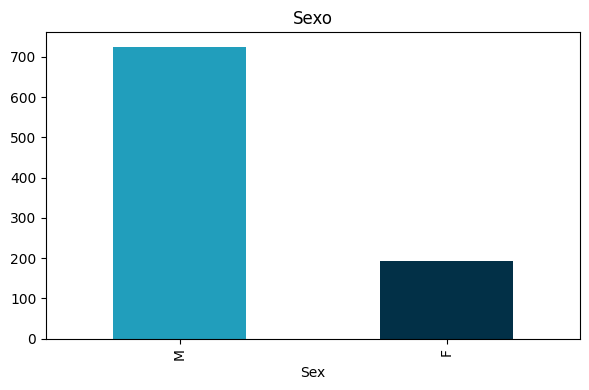

In [ ]:
# Visualização através do gráfico
plt.rcParams["figure.figsize"] = [6.00, 4.00]
plt.rcParams["figure.autolayout"] = True

df_original.Sex.value_counts().plot(kind='bar', title='Sexo', color = ['#219ebc', '#023047']);

In [ ]:
# Quantidade de observações por Tipo de Dor Toráxica
df_original.groupby(['ChestPainType']).size()

,0
ChestPainType,
ASY,496
ATA,173
NAP,203
TA,46


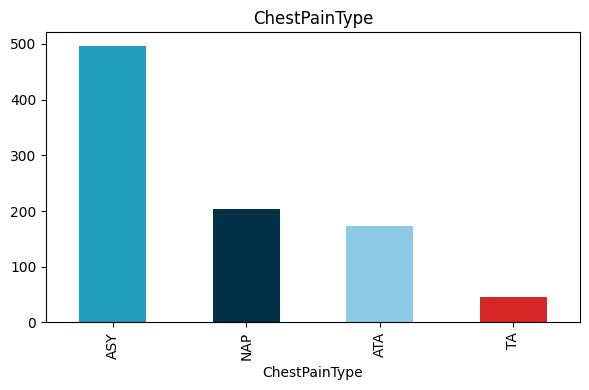

In [ ]:
# Visualizando através do gráfico
df_original.ChestPainType.value_counts().plot(kind='bar', title='ChestPainType', color = ['#219ebc', '#023047', '#8ecae6', '#d62728']);

In [ ]:
# Quantidade de observações por Glicemia em Jejum
df_original.groupby(['FastingBS']).size()

,0
FastingBS,
0,704
1,214


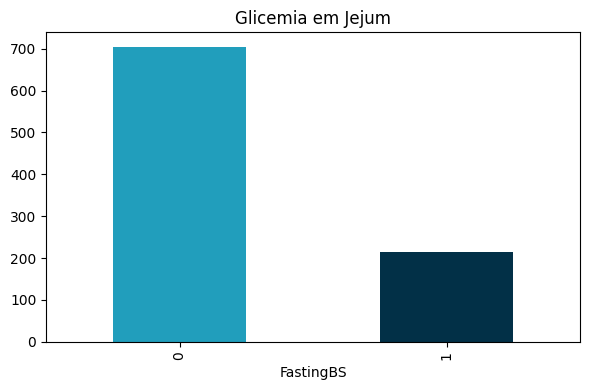

In [ ]:
# Visualizando através do gráfico
df_original.FastingBS.value_counts().plot(kind='bar', title='Glicemia em Jejum', color = ['#219ebc', '#023047']);

In [ ]:
# Quantidade de observações por tipo de Eletrocardiograma em Repouso
df_original.groupby(['RestingECG']).size()

,0
RestingECG,
LVH,188
Normal,552
ST,178


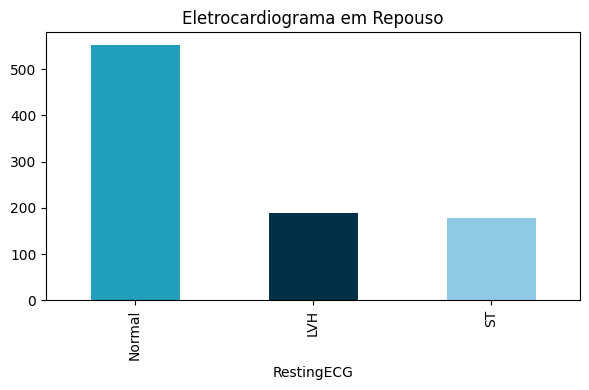

In [ ]:
# Visualizando através do gráfico
df_original.RestingECG.value_counts().plot(kind='bar', title='Eletrocardiograma em Repouso', color = ['#219ebc', '#023047', '#8ecae6']);

In [ ]:
# Quantidade de observações por Angina Induzida
df_original.groupby(['ExerciseAngina']).size()

,0
ExerciseAngina,
N,547
Y,371


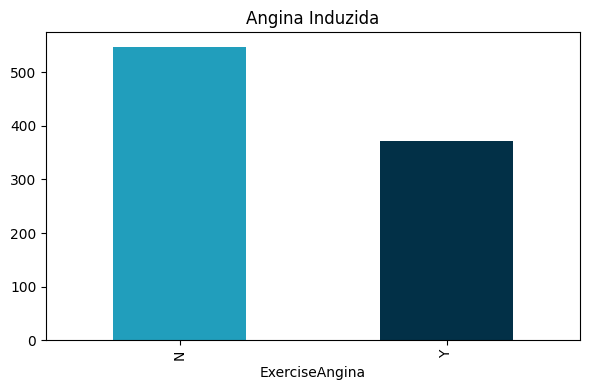

In [ ]:
# Visualizando através do gráfico
df_original.ExerciseAngina.value_counts().plot(kind='bar', title='Angina Induzida', color = ['#219ebc', '#023047']);

In [ ]:
# Quantidade de observações Inclinação Pico Exercício
df_original.groupby(['ST_Slope']).size()

,0
ST_Slope,
Down,63
Flat,460
Up,395


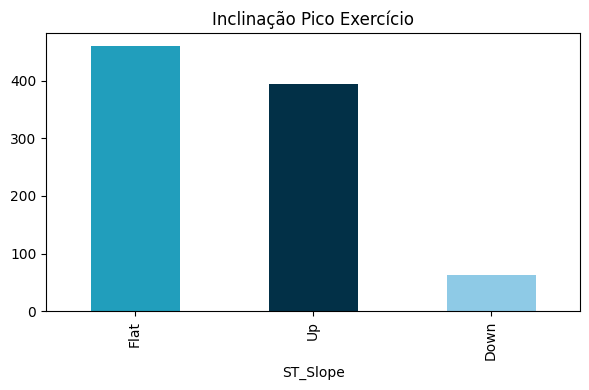

In [ ]:
# Vizualização através do gráfico
df_original.ST_Slope.value_counts().plot(kind='bar', title='Inclinação Pico Exercício', color = ['#219ebc', '#023047', '#8ecae6']);

## **2.6 Avaliar o balanceamento da variável ALVO (Target)**
Conforme informado pela documentação, HeartDisease é a classe de saída. Portanto, será a variável Target. Na análise abaixo, fica claro o desbalanceamento. Essa consideração é importante pois alguns algoritmos de machine learning podem ficar tendenciosos para a classe majoritária, prejudicando a performance em prever a classe minoritária.

In [ ]:
# Quantidade de observações Doença Cardíaca (Variavel TARGET)
df_original.groupby(['HeartDisease']).size()

,0
HeartDisease,
0,410
1,508


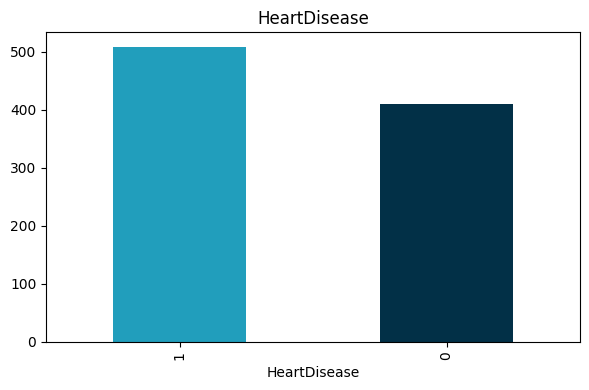

In [ ]:
df_original.HeartDisease.value_counts().plot(kind='bar', title='HeartDisease', color = ['#219ebc', '#023047']);

## **2.7 Analisar a relação de cada variável x variável alvo**

In [ ]:
# Formatando o tamanho do plot
plt.rcParams["figure.figsize"] = [6.00, 4.00]
plt.rcParams["figure.autolayout"] = True

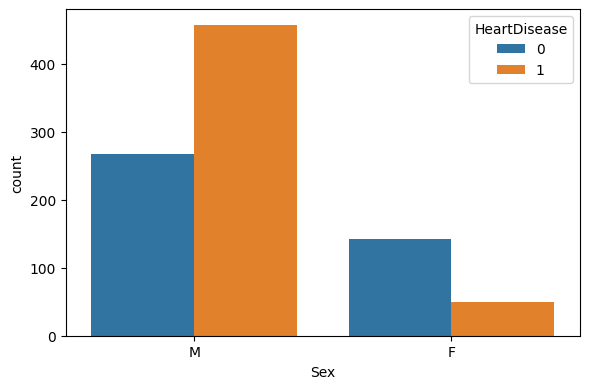

In [ ]:
# Visualizando a Variável Sex x HeartDisease
sns.countplot(data=df_original, x='Sex', hue='HeartDisease');
plt.show()

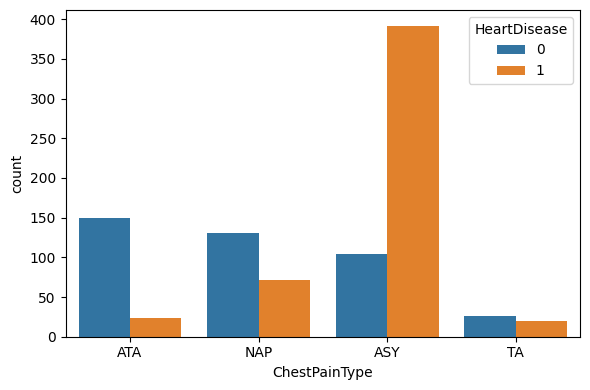

In [ ]:
# Visualizando a variável ChestPainType x HeartDisease
sns.countplot(data=df_original, x='ChestPainType', hue='HeartDisease');
plt.show()

**Obs.:** É possível ver claramente uma forte relação do valor ASY da variável ChestPainType sobre o resultado da classe de saída.

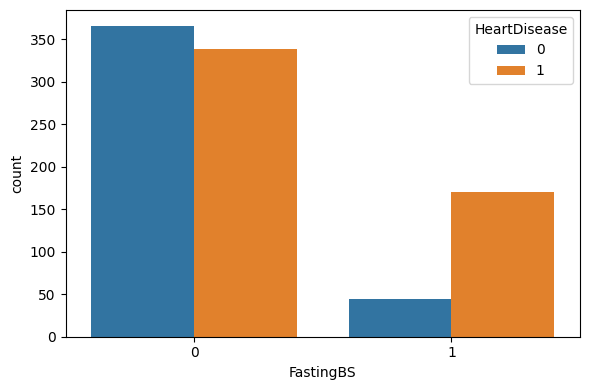

In [ ]:
# Visualizando a variável FastingBS x HeartDisease
sns.countplot(data=df_original, x='FastingBS', hue='HeartDisease');
plt.show()

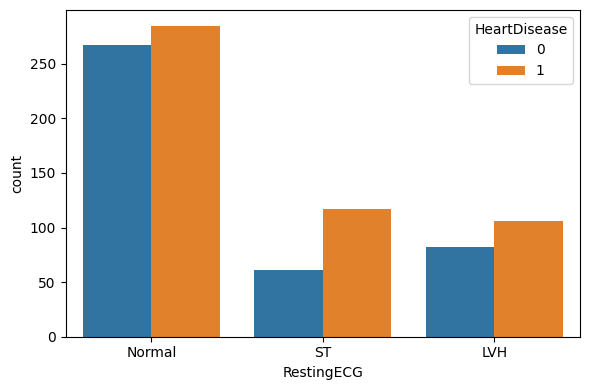

In [ ]:
# Visualizando a variável RestingECG x HeartDisease
sns.countplot(data=df_original, x='RestingECG', hue='HeartDisease');
plt.show()

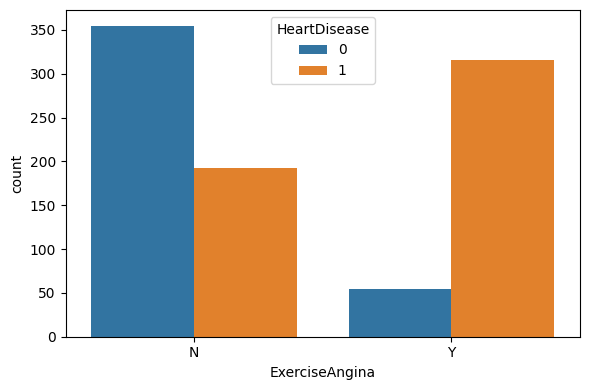

In [ ]:
# Visualizando a variável ExerciseAngina x HeartDisease
sns.countplot(data=df_original, x='ExerciseAngina', hue='HeartDisease');
plt.show()

**Obs.:** Conforme é mostrado no gráfico, a variável ExerciseAngina possui uma forte relação com a variável de saída.

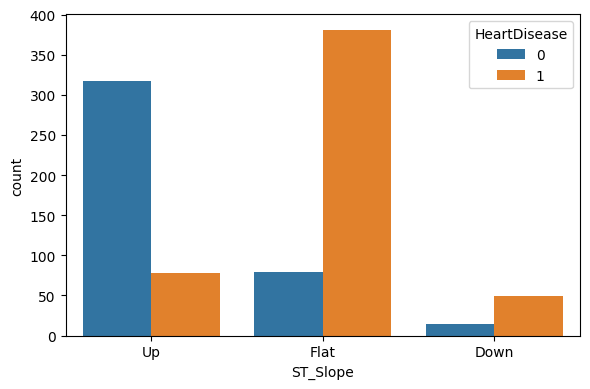

In [ ]:
# Visualizando a variável ST_Slope x HeartDisease
sns.countplot(data=df_original, x='ST_Slope', hue='HeartDisease');
plt.show()

**Obs.:** Também é possível observar a forte relação da variável ST_Slope com a variável HeartDisease.

<ipython-input-73-2064792364>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


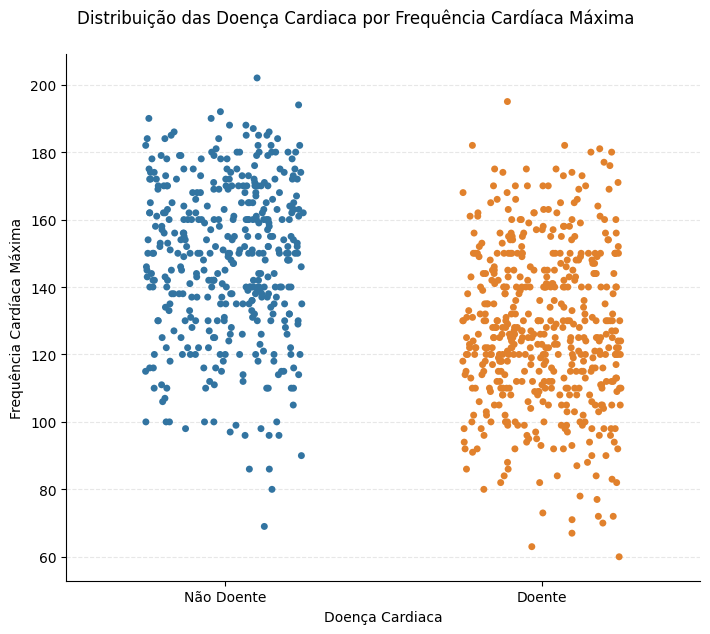

In [ ]:
# Utilize um catplot do tipo 'strip' para visualizar a distribuição das despesas médicas de acordo com o status de fumante
import seaborn as sns

# Criar catplot do tipo strip
g = sns.catplot(
    data=df_original,
    x='HeartDisease',
    y='MaxHR',
    kind='strip',
    palette=['#3274A1', '#E1812C'],
    height=6,
    aspect=1.2,
    jitter=0.25  # Controla a dispersão dos pontos
)

# Personalizar o gráfico
g.set_axis_labels('Doença Cardiaca', 'Frequência Cardíaca Máxima')
g.fig.suptitle('Distribuição das Doença Cardiaca por Frequência Cardíaca Máxima', y=1.05)
g.set_xticklabels(['Não Doente', 'Doente'])

# Adicionar grid
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Mostrar o gráfico
plt.show()

<ipython-input-74-1603103184>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


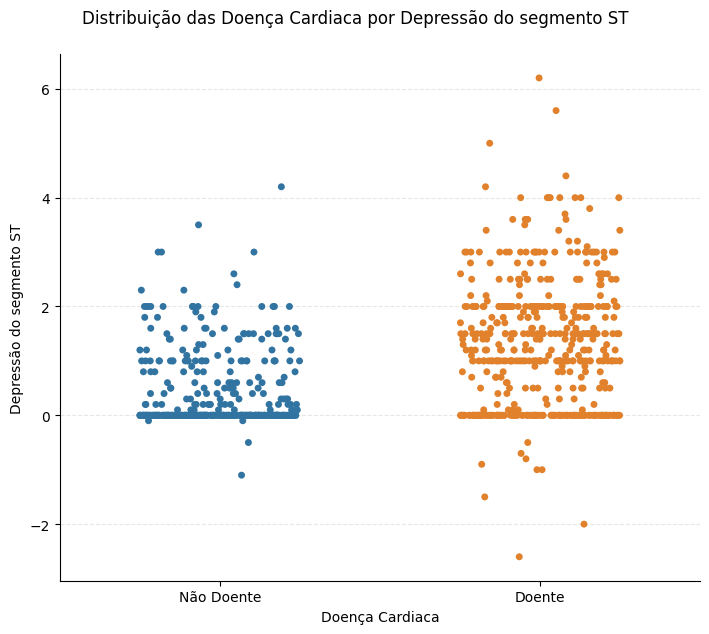

In [ ]:
# Utilize um catplot do tipo 'strip' para visualizar a distribuição das despesas médicas de acordo com o status de fumante
import seaborn as sns

# Criar catplot do tipo strip
g = sns.catplot(
    data=df_original,
    x='HeartDisease',
    y='Oldpeak',
    kind='strip',
    palette=['#3274A1', '#E1812C'],
    height=6,
    aspect=1.2,
    jitter=0.25  # Controla a dispersão dos pontos
)

# Personalizar o gráfico
g.set_axis_labels('Doença Cardiaca', 'Depressão do segmento ST')
g.fig.suptitle('Distribuição das Doença Cardiaca por Depressão do segmento ST', y=1.05)
g.set_xticklabels(['Não Doente', 'Doente'])

# Adicionar grid
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Mostrar o gráfico
plt.show()

## **2.8 Correlação entre Variáveis**
ChestPainType, MaxHR, ExerciseAngina, OldPeak e ST_Slope são as variáveis com a mais forte correlação em relação à variavel HeartDisease.

Colunas categóricas: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


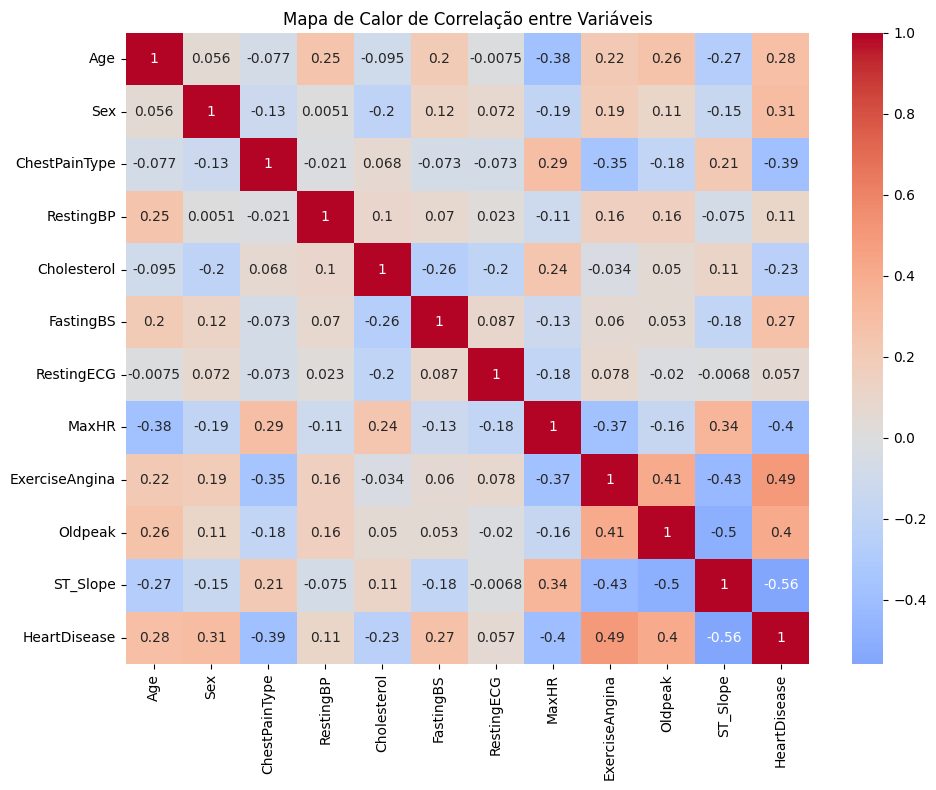

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identificar colunas categóricas
categorical_cols = df_original.select_dtypes(include=['object', 'category']).columns
print("Colunas categóricas:", categorical_cols)

# Copiar o DataFrame original
df_encoded = df_original.copy()

# Aplicar LabelEncoder em todas as colunas categóricas
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Garantir que todas as colunas agora são numéricas
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Remover colunas completamente não numéricas ou inválidas
df_encoded = df_encoded.dropna(axis=1, how='all')

# Gerar matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlação entre Variáveis')
plt.show()

<ipython-input-76-787312852>:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


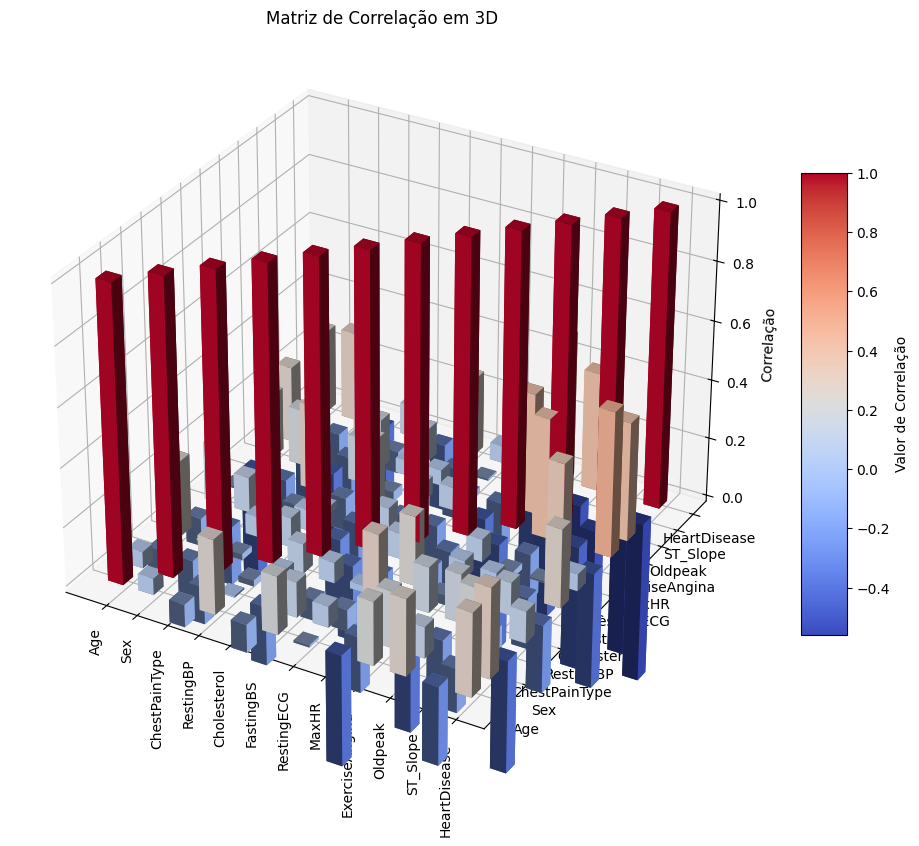

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gerar matriz de correlação
correlation_matrix = df_encoded.corr()
labels = correlation_matrix.columns

# Preparar dados para o gráfico 3D
xpos, ypos = np.meshgrid(range(len(labels)), range(len(labels)))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Tamanho das barras
dx = dy = 0.5
dz = correlation_matrix.values.flatten()

# Criar figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Definir cores baseadas nos valores de correlação
colors = plt.cm.coolwarm((dz - dz.min()) / (dz.max() - dz.min()))

# Plotar as barras 3D
bars = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, shade=True)

# Configurar eixos e rótulos
ax.set_xticks(np.arange(len(labels)) + 0.5)
ax.set_yticks(np.arange(len(labels)) + 0.5)
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)
ax.set_zlabel('Correlação')

# Adicionar barra de cores
mappable = plt.cm.ScalarMappable(cmap='coolwarm')
mappable.set_array(dz)
plt.colorbar(mappable, ax=ax, shrink=0.6, aspect=10, label='Valor de Correlação')

plt.title('Matriz de Correlação em 3D')
plt.tight_layout()
plt.show()


### **2.8.1 Correlações Fortes com HeartDisease (Variável Alvo)**
- ST_Slope (Inclinação do Segmento ST) (-0.56):
mostra que inclinações descendentes ("Down") ou planas ("Flat") estão fortemente associadas a maior risco cardíaco. Essas alterações indicam problemas no fluxo sanguíneo cardíaco.

- ExerciseAngina (Dor no Exercício) (0.49):
revela que quem experimenta angina durante exercício tem quase 50% mais probabilidade de doença cardíaca, sendo um sinal clássico de obstrução arterial.

- MaxHR (Frequência Cardíaca Máxima) (-0.40): indica que valores mais baixos estão associados a maior risco. Isso sugere que capacidade cardiovascular reduzida pode ser um fator de risco importante.

- Oldpeak (Depressão do ST) (0.40): valores mais altos indicam maior risco cardíaco, pois refletem anormalidades no suprimento de oxigênio ao músculo cardíaco.

- ChestPainType (Tipo de Dor Torácica) (-0.39): mostra que dores atípicas e casos assintomáticos estão associados a maior risco, especialmente preocupante em diabéticos e idosos onde sintomas podem ser silenciosos.



### **2.8.2 Outras Correlações Notáveis**
ST_Slope ↔ Oldpeak (-0.50):

        - Inclinação anormal do ST correlacionada com depressão do segmento ST (esperado clinicamente)

ExerciseAngina ↔ ST_Slope (-0.43):

        - Pacientes com angina durante exercício tendem a ter inclinação ST anormal

ExerciseAngina ↔ Oldpeak (0.41):

        - Angina durante exercício associada a maior depressão do ST

### **2.8.3 Correlações Moderadas**

Age ↔ HeartDisease (0.28)

        - Idade avançada aumenta risco

Sex ↔ HeartDisease (0.31)

      	- Sexo masculino (M=0) associado a maior risco

MaxHR ↔ Age	(-0.38)
        
        - Idade avançada → Frequência cardíaca máxima mais baixa

### **2.8.4 Surpresas e Alertas**

Cholesterol ↔ HeartDisease (-0.23):

        - Correlação negativa inesperada!
        - Possíveis causas: viés amostral, pacientes em tratamento, ou relação não linear

RestingBP ↔ HeartDisease (0.11):

        - Pressão arterial em repouso mostra baixa correlação
        - Sugere que outros fatores são mais determinantes

FastingBS ↔ HeartDisease (0.27):

        - Glicemia elevada em jejum aumenta risco cardíaco (esperado)

## **2.9. Analisar possíveis outliers**

In [ ]:
#carregar variáveis para plot
variaveis_numericas = []
for i in df_original.columns[0:11].tolist():
    if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':
        variaveis_numericas.append(i)
variaveis_numericas

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [ ]:
Q1 = df_original['RestingBP'].quantile(0.25)
Q3 = df_original['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_original[(df_original['RestingBP'] < limite_inferior) | (df_original['RestingBP'] > limite_superior)]
print(f"Número de outliers encontrados: {outliers.shape[0]}")


Número de outliers encontrados: 28


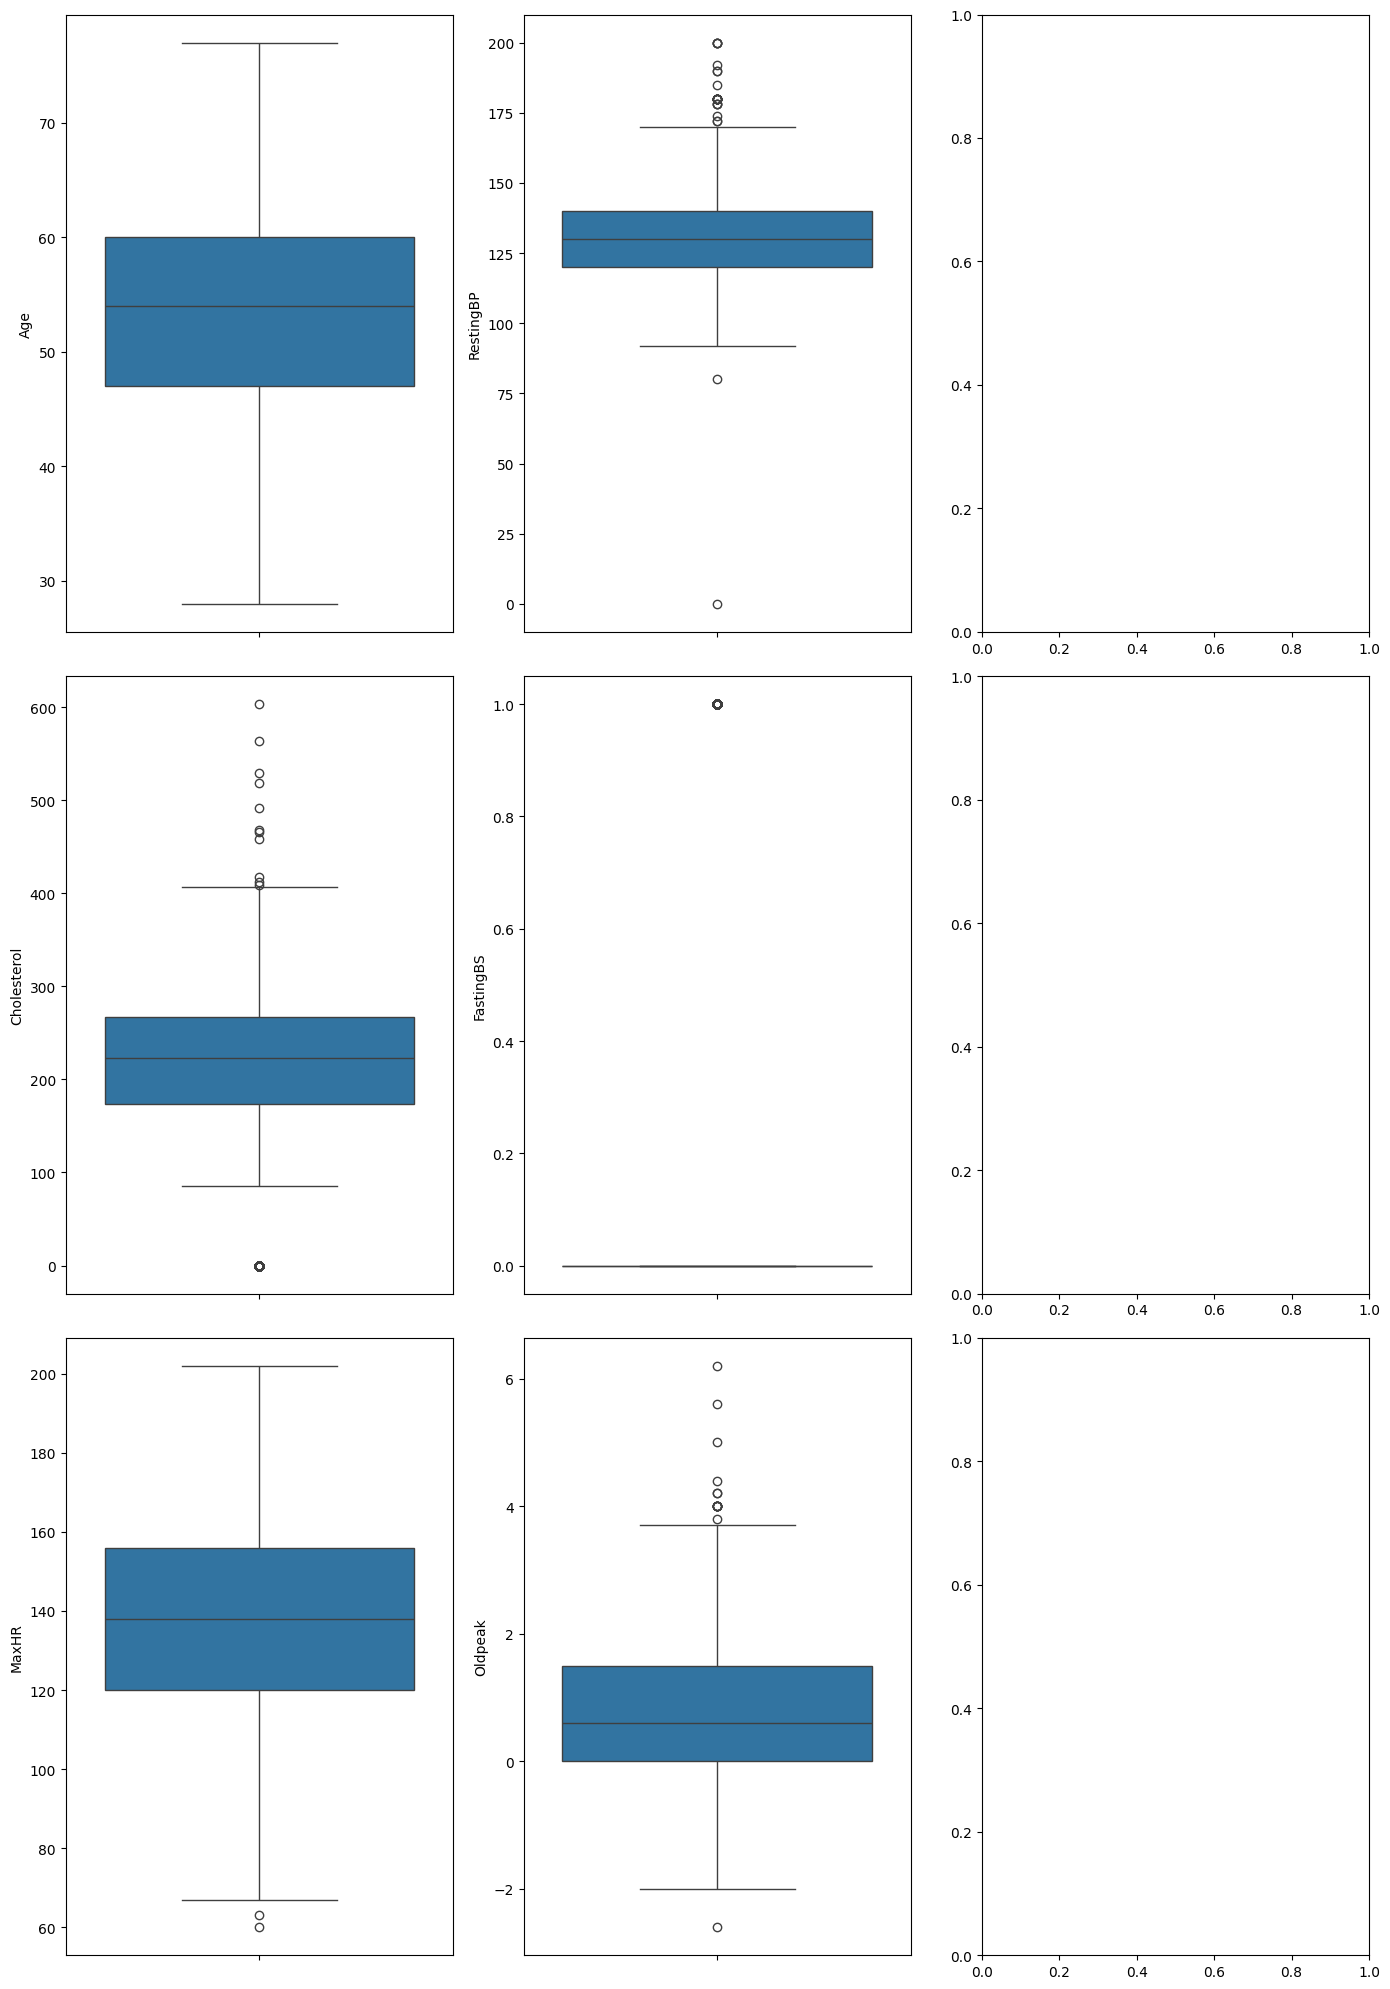

In [ ]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 3) #3 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

## **2.10 Analizar a distribuição dos dados**


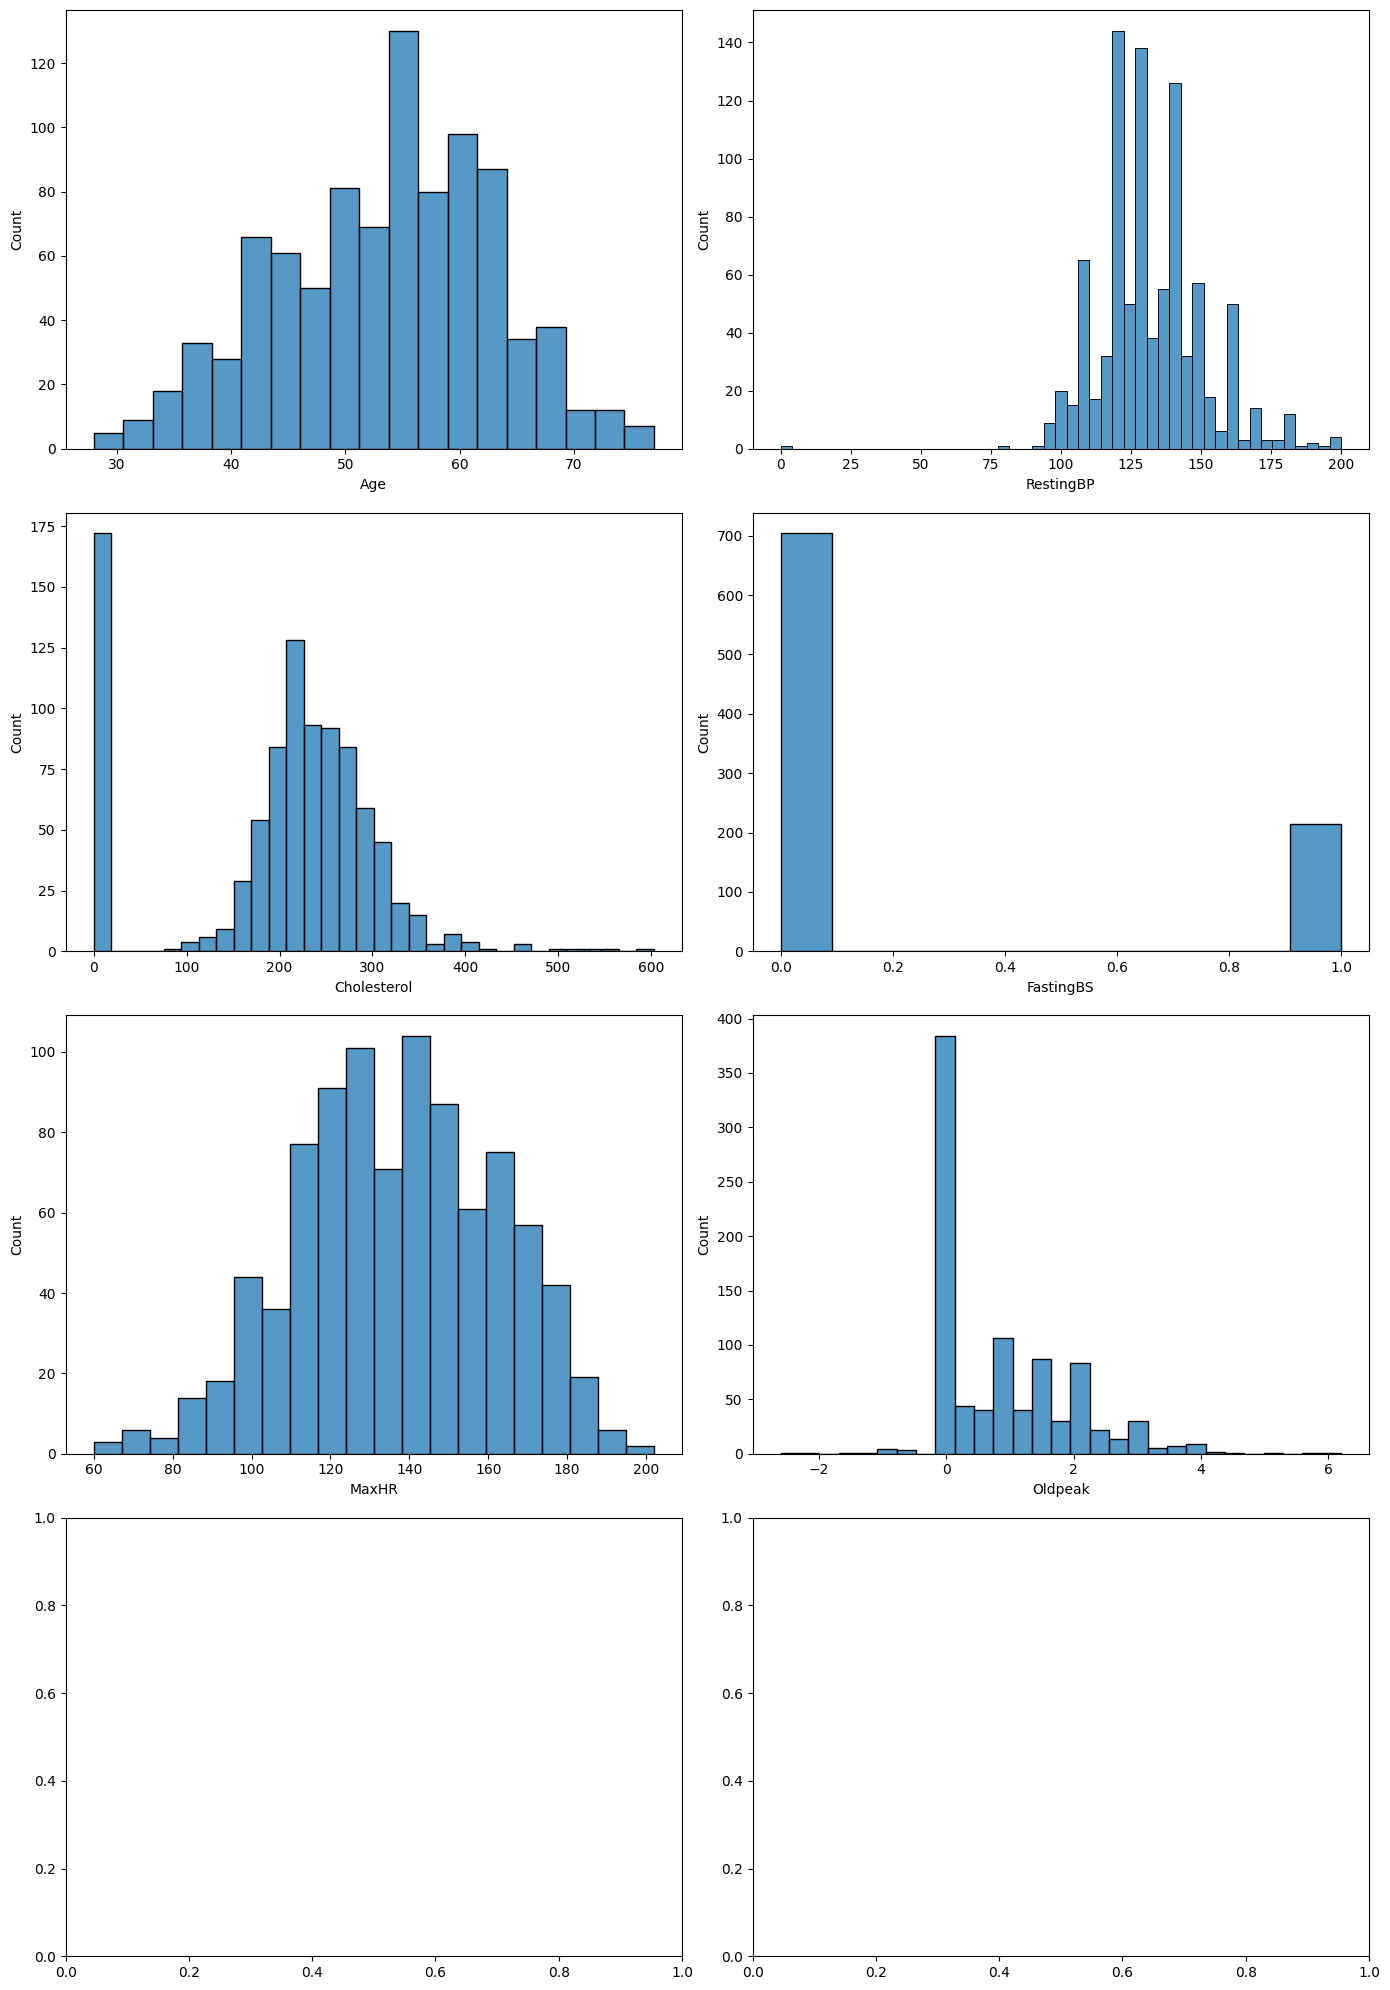

In [ ]:
#Podemos observar nos boxplots que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = df_original, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

**Obs.:** É possível observar por meio do histograma da variável Cholesterol uma grande quantidade de valores zerados.

#**3. Pré-processamento dos Dados**

##**3.1. Tratamento de Outliers**

Identificar outliers (método do IQR)

In [ ]:
df_tratado = df_original.copy()

###**3.1.1 Tratamento da variável RestingBP**

In [ ]:
Q1 = df_original['RestingBP'].quantile(0.25)
Q3 = df_original['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_original[(df_original['RestingBP'] < limite_inferior) | (df_original['RestingBP'] > limite_superior)]
print(f"Número de outliers encontrados: {outliers.shape[0]}")


Número de outliers encontrados: 28


In [ ]:
# Substituir outliers por valores como a mediana
mediana = df_original['RestingBP'].median()
df_tratado['RestingBP'] = df_original['RestingBP'].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

In [ ]:
# Comparando estatísticas
print("Estatísticas antes do tratamento:")
print(df_original['RestingBP'].describe())

print("\nEstatísticas após o tratamento:")
print(df_tratado['RestingBP'].describe())

Estatísticas antes do tratamento:
count   918.00
mean    132.40
std      18.51
min       0.00
25%     120.00
50%     130.00
75%     140.00
max     200.00
Name: RestingBP, dtype: float64

Estatísticas após o tratamento:
count   918.00
mean    131.08
std      15.60
min      92.00
25%     120.00
50%     130.00
75%     140.00
max     170.00
Name: RestingBP, dtype: float64


##**3.2. Pré Processamento**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
#from imblearn.over_sampling import SMOTE # usado no balanceamento
from sklearn.metrics import ConfusionMatrixDisplay

# Definir colunas por tipo
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'FastingBS', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Pré-processamento
X = df_tratado.drop('HeartDisease', axis=1)
y = df_tratado['HeartDisease']

# Transformador para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# **4. Divisão dos dados**

## **4.1 Divisão entre treino e teste**

- Divisão dos dados em conjuntos de treino e teste por meio do `train_test_split`:
  - 70% para treino
  - 30% para teste
- Foi utilizado um `random_state` para garantir a reprodutibilidade.

In [ ]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#**5. Treinamento**

O modelo escolhido foi o **Random Forest**. Os demais modelos servem apenas para comparação de desempenho.


Modelo: Decision Tree
Acurácia: 0.8370
Precisão: 0.8371
Recall: 0.8370
F1-Score: 0.8370
Validação Cruzada (5-fold): 0.7776 ± 0.0582



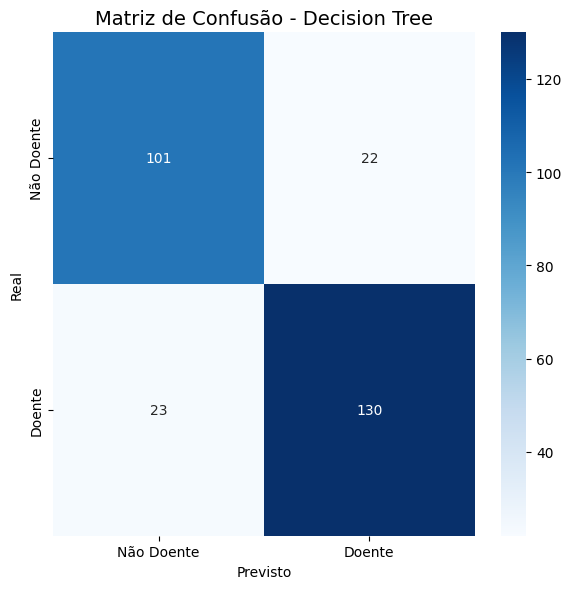


Modelo: Random Forest
Acurácia: 0.9130
Precisão: 0.9131
Recall: 0.9130
F1-Score: 0.9129
Validação Cruzada (5-fold): 0.8136 ± 0.0457



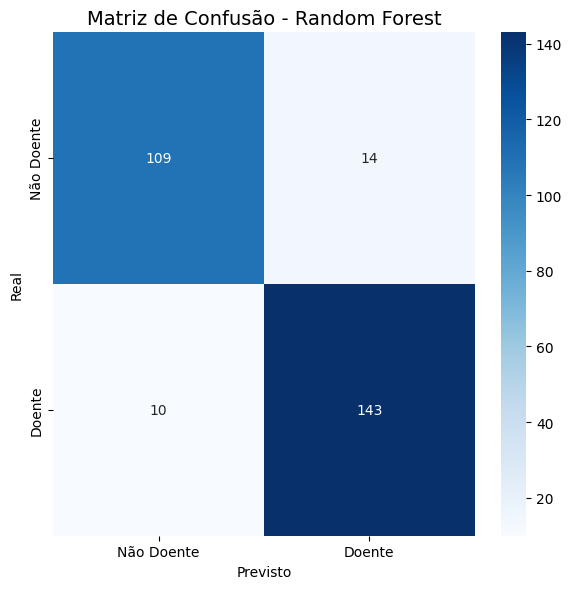


Modelo: KNN
Acurácia: 0.8841
Precisão: 0.8840
Recall: 0.8841
F1-Score: 0.8838
Validação Cruzada (5-fold): 0.8289 ± 0.0382



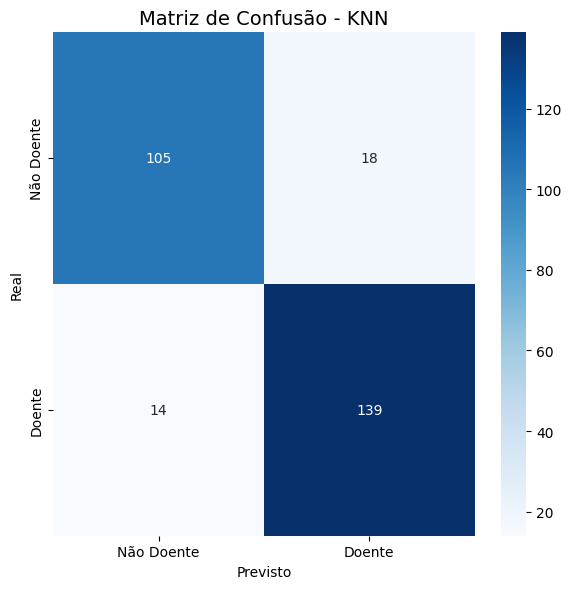


Modelo: Perceptron
Acurácia: 0.8587
Precisão: 0.8694
Recall: 0.8587
F1-Score: 0.8590
Validação Cruzada (5-fold): 0.7995 ± 0.0785



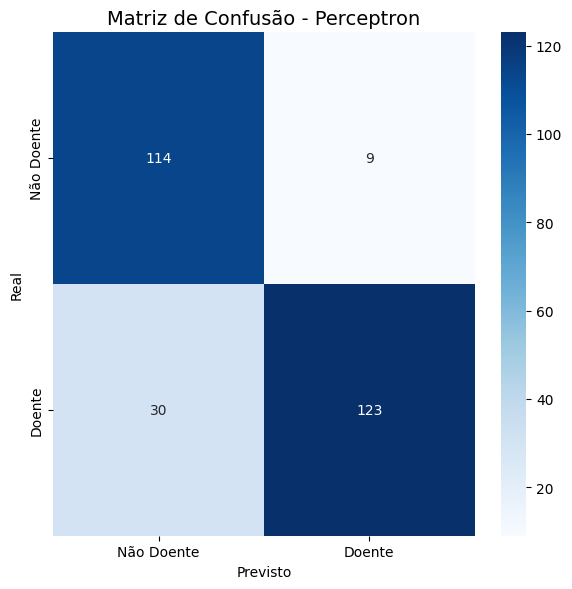


Modelo: MLP
Acurácia: 0.8587
Precisão: 0.8597
Recall: 0.8587
F1-Score: 0.8589
Validação Cruzada (5-fold): 0.7984 ± 0.0214



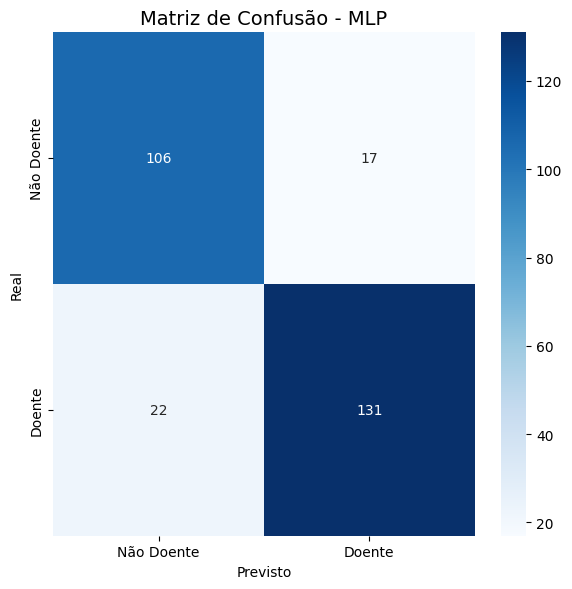

In [ ]:

# Criar modelos
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced',  random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Perceptron": Perceptron(eta0=0.1, class_weight='balanced', random_state=42, max_iter=1000, tol=1e-3),
    "MLP": MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu',
                        solver='adam', max_iter=1000, random_state=42)
}

# Treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    # Criar pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Treinar modelo
    pipeline.fit(X_train, y_train)

    # Fazer previsões
    y_pred = pipeline.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Validação cruzada
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

    # Armazenar resultados
    results[name] = {
        'model': pipeline,
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1': report['weighted avg']['f1-score'],
        'confusion_matrix': conf_matrix,
        'cv_mean': np.mean(cv_scores),
        'cv_std': np.std(cv_scores)
    }
    # Imprimir resultados dos diferentes modelos
    print(f"\n{'='*50}")
    print(f"Modelo: {name}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {results[name]['precision']:.4f}")
    print(f"Recall: {results[name]['recall']:.4f}")
    print(f"F1-Score: {results[name]['f1']:.4f}")
    print(f"Validação Cruzada (5-fold): {results[name]['cv_mean']:.4f} ± {results[name]['cv_std']:.4f}\n")

    # Plotar matriz de confusão
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Doente', 'Doente'],
            yticklabels=['Não Doente', 'Doente'])
    plt.title(f'Matriz de Confusão - {name}', fontsize=14)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

#**6. Resultados**

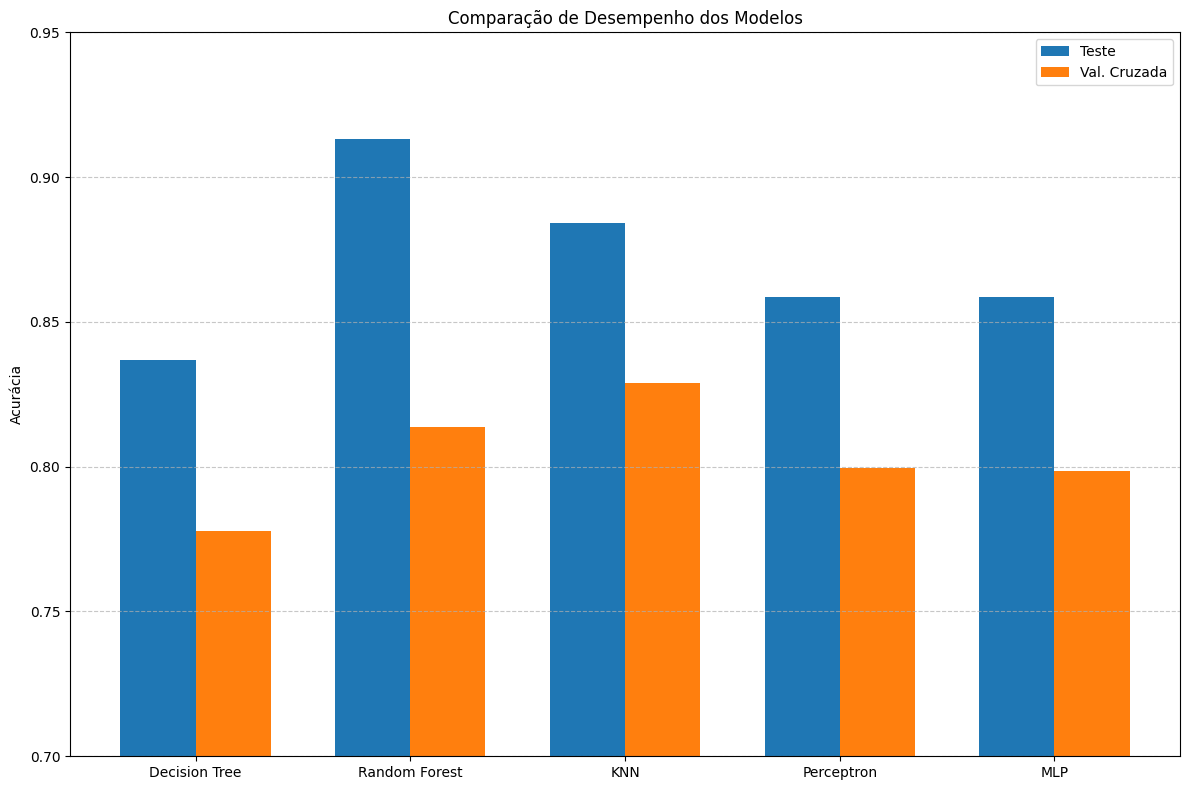

In [ ]:
# Comparação visual dos modelos
plt.figure(figsize=(12, 8))
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
cv_means = [results[name]['cv_mean'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Teste')
plt.bar(x + width/2, cv_means, width, label='Val. Cruzada')
plt.xticks(x, model_names)
plt.ylabel('Acurácia')
plt.title('Comparação de Desempenho dos Modelos')
plt.legend()
plt.ylim(0.7, 0.95)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Esse gráfico de barras compara o desempenho dos modelos de classificação em dois cenários: acurácia no conjunto de teste (barras azuis) e acurácia média da validação cruzada (barras laranjas). Observa-se que todos os modelos obtiveram uma acurácia de teste superior à média da validação cruzada, o que pode indicar overfitting leve — especialmente no caso do Random Forest, cuja diferença entre teste e validação cruzada é a maior. Já o KNN apresentou desempenho mais equilibrado entre os dois cenários, sugerindo maior generalização. O gráfico permite comparar rapidamente a robustez e a estabilidade de cada modelo ao longo do treinamento.

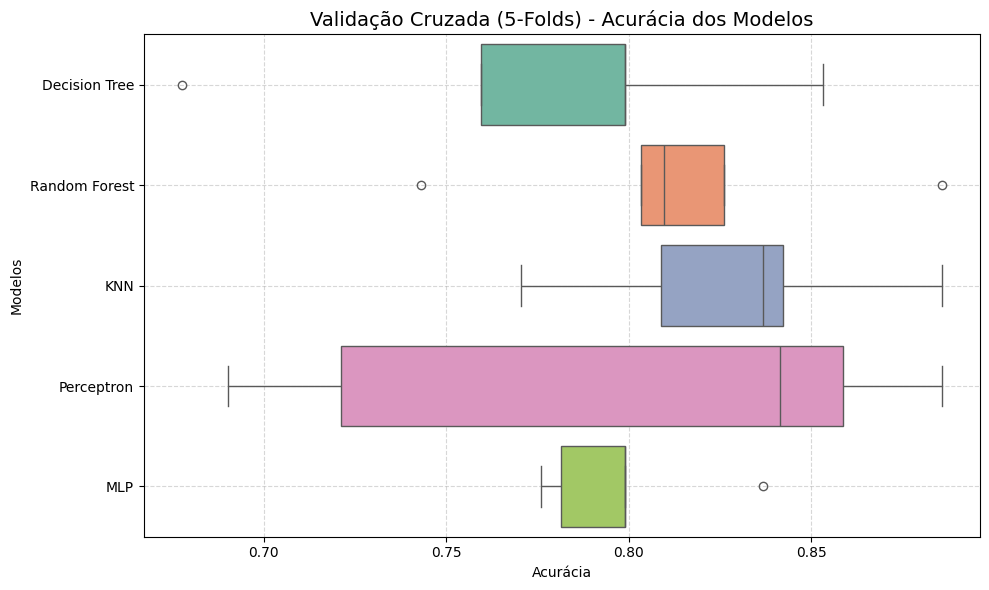

In [ ]:
# Reexecutar apenas a validação cruzada para cada modelo
cv_all_scores = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    cv_all_scores[name] = scores

# Transformar em DataFrame para visualização
cv_df = pd.DataFrame(cv_all_scores)

# Plotar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_df, orient='h', palette='Set2')
plt.title('Validação Cruzada (5-Folds) - Acurácia dos Modelos', fontsize=14)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

O gráfico de vela (boxplot) exibe a variação da acurácia dos cinco modelos de classificação após validação cruzada com 5 folds. Cada barra representa a distribuição dos resultados por modelo, indicando a mediana (linha central), os quartis (caixa), a amplitude (linhas horizontais) e possíveis outliers (pontos fora das extremidades). Observa-se que o Perceptron apresentou a maior variação de desempenho, indicando instabilidade nos diferentes folds, enquanto o Random Forest teve desempenho mais consistente e relativamente alto. Modelos como KNN e Decision Tree mostraram variação moderada, e o MLP teve acurácia mais baixa e estável.